In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
%matplotlib inline

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
df= pd.read_csv('../input/electric-power-consumption-data-set/household_power_consumption.txt', sep = ';', parse_dates= ['Date'], infer_datetime_format=True, low_memory=False,  na_values=['nan','?'])
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [3]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [4]:
#Filling missing data by imputation - Forward fill
df_ffill = df.fillna(method= 'ffill' )
df_ffill.isnull().sum() 

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

# Average consumption of each day in 4 years


In [5]:
consumption_by_date = df.groupby(['Date']).mean()
consumption_by_date

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972
...,...,...,...,...,...,...,...
2010-11-22,1.417733,0.098857,240.197118,6.014167,3.371528,1.465278,7.038889
2010-11-23,1.095511,0.095451,240.575528,4.674444,1.299306,0.318056,5.285417
2010-11-24,1.247394,0.091986,240.030965,5.249583,0.761111,1.977778,8.488889


Text(0.5, 1.0, 'Sub_metering_3')

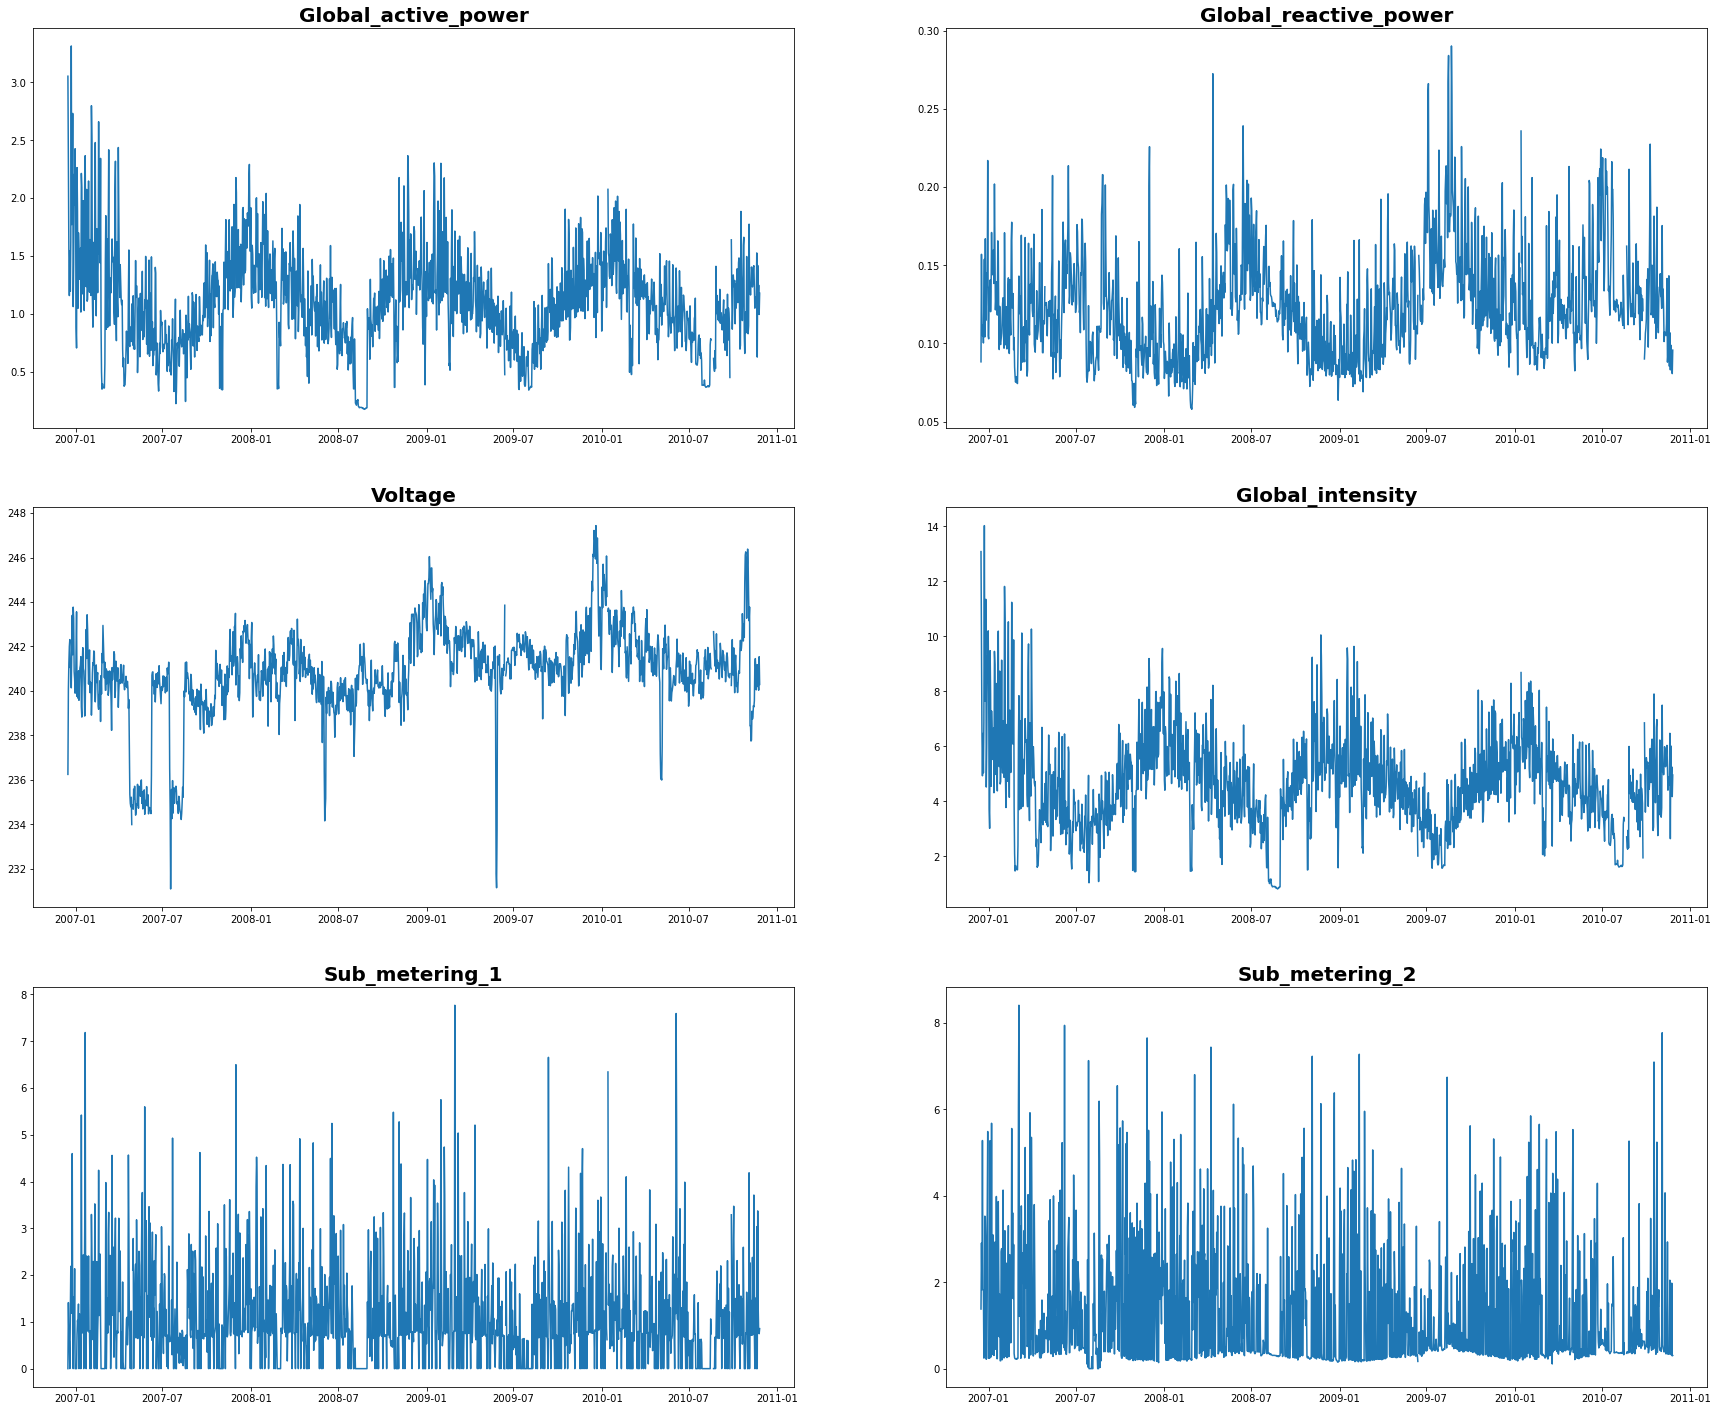

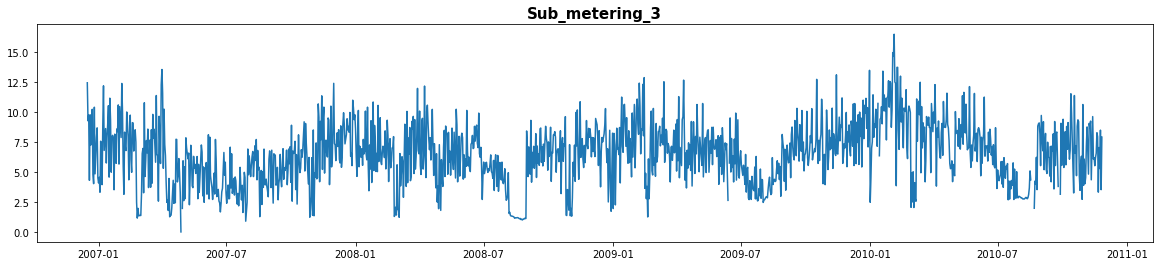

In [6]:
fig, axs = plt.subplots(3, 2, figsize = (30, 25))
columns = consumption_by_date.columns
axs[0, 0].plot(consumption_by_date[columns[0]])
axs[0, 0].set_title(columns[0], fontweight = 'bold', size = 20)

axs[0, 1].plot(consumption_by_date[columns[1]])
axs[0, 1].set_title(columns[1], fontweight = 'bold', size = 20)

axs[1, 0].plot(consumption_by_date[columns[2]])
axs[1, 0].set_title(columns[2], fontweight = 'bold', size = 20)

axs[1, 1].plot(consumption_by_date[columns[3]])
axs[1, 1].set_title(columns[3], fontweight = 'bold', size = 20)

axs[2, 0].plot(consumption_by_date[columns[4]])
axs[2, 0].set_title(columns[4], fontweight = 'bold', size = 20)

axs[2, 1].plot(consumption_by_date[columns[5]])
axs[2, 1].set_title(columns[5], fontweight = 'bold', size = 20)

fig, axs = plt.subplots( figsize = (20, 4))
axs.plot(consumption_by_date[columns[6]])
axs.set_title(columns[6], fontweight = 'bold', size = 15)

# Average consumption in each month

In [7]:
consumption_month = df.groupby(df['Date'].dt.strftime('%B')).mean()
reorderlist = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December' ]
consumption_month = consumption_month.reindex(reorderlist)
consumption_month

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
January,1.462226,0.110721,242.177646,6.138727,1.406481,1.548839,7.794054
February,1.300431,0.099661,241.459366,5.447099,1.132143,1.386569,7.587332
March,1.231343,0.111257,241.528648,5.176797,1.266721,1.661699,6.928493
April,1.047146,0.122779,241.044744,4.424004,1.075624,1.173244,6.678212
May,1.029571,0.127903,239.008514,4.403161,1.234916,1.307813,6.696841
June,0.909148,0.146254,239.912401,3.926679,1.330837,1.244410,6.172105
July,0.700359,0.151889,240.003656,3.062319,0.707637,0.992232,4.275768
August,0.572812,0.139446,240.173848,2.514592,0.508429,0.804928,3.857316
September,0.975653,0.132875,240.452275,4.169791,1.155922,1.184778,6.356396


Text(0.5, 1.0, 'Sub_metering_3')

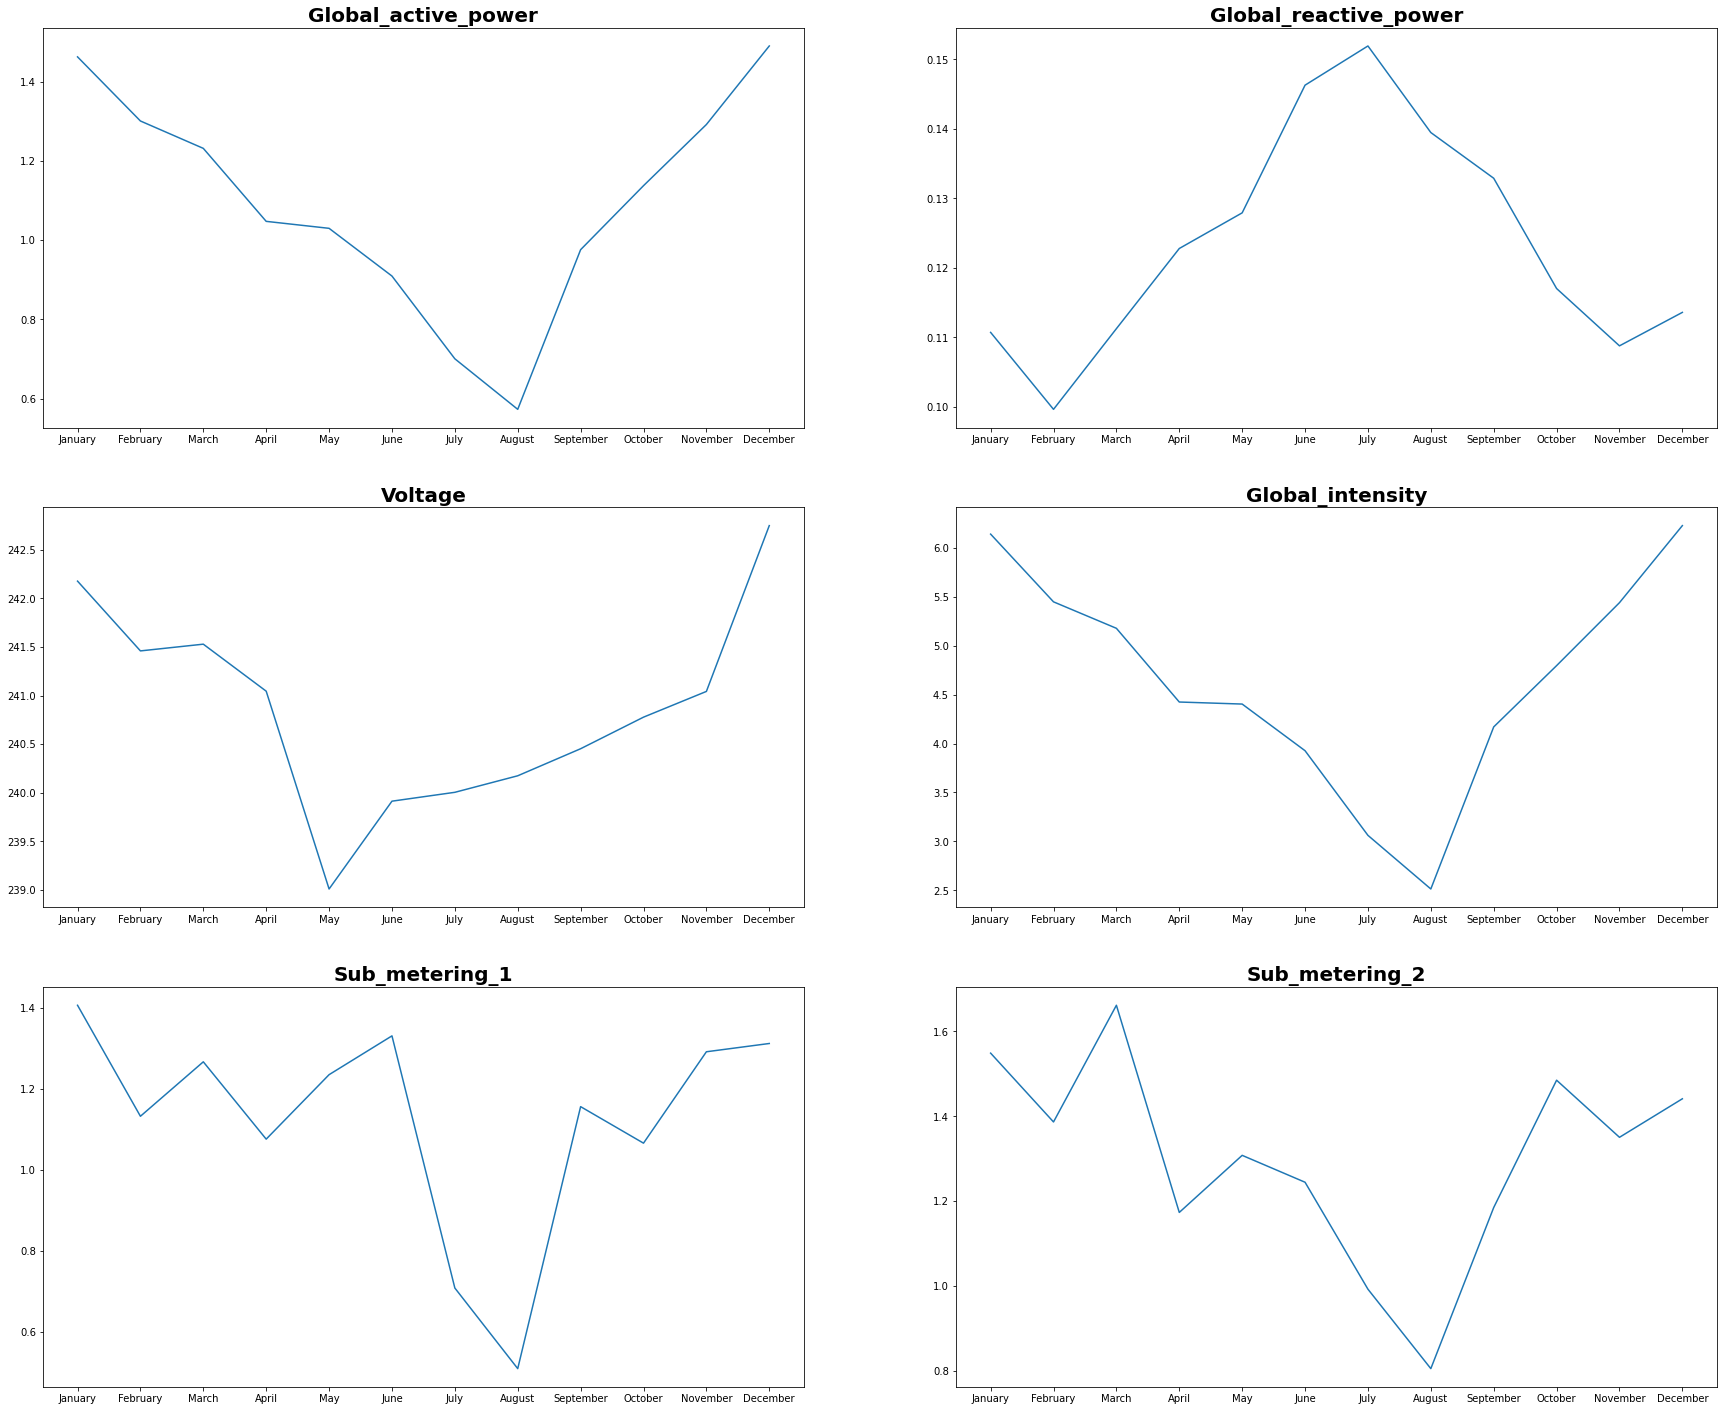

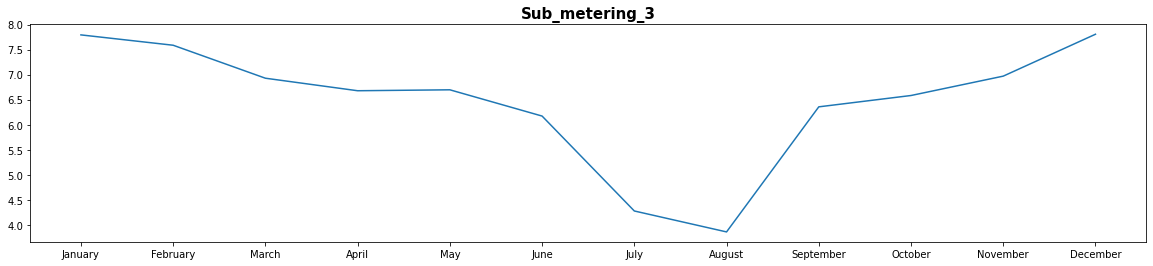

In [8]:
fig, axs = plt.subplots(3, 2, figsize = (30, 25))
columns = consumption_month.columns

axs[0, 0].plot(consumption_month[columns[0]])
axs[0, 0].set_title(columns[0], fontweight = 'bold', size = 20)

axs[0, 1].plot(consumption_month[columns[1]])
axs[0, 1].set_title(columns[1], fontweight = 'bold', size = 20)

axs[1, 0].plot(consumption_month[columns[2]])
axs[1, 0].set_title(columns[2], fontweight = 'bold', size = 20)

axs[1, 1].plot(consumption_month[columns[3]])
axs[1, 1].set_title(columns[3], fontweight = 'bold', size = 20)


axs[2, 0].plot(consumption_month[columns[4]])
axs[2, 0].set_title(columns[4], fontweight = 'bold', size = 20)

axs[2, 1].plot(consumption_month[columns[5]])
axs[2, 1].set_title(columns[5], fontweight = 'bold', size = 20)

fig, axs = plt.subplots( figsize = (20, 4))
axs.plot(consumption_month[columns[6]])
axs.set_title(columns[6], fontweight = 'bold', size = 15)

In [9]:
import pandas as pd
import numpy as np
from pandas import datetime as dt
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


# Average consumption of each day in a month

In [10]:
df_2 = pd.read_csv('/kaggle/input/electric-power-consumption-data-set/household_power_consumption.txt', sep=';', 
                 parse_dates={'dates' : ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['nan','?'], index_col='dates')
df_2.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dates,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


Text(0.5, 1.0, 'Sub_metering_3')

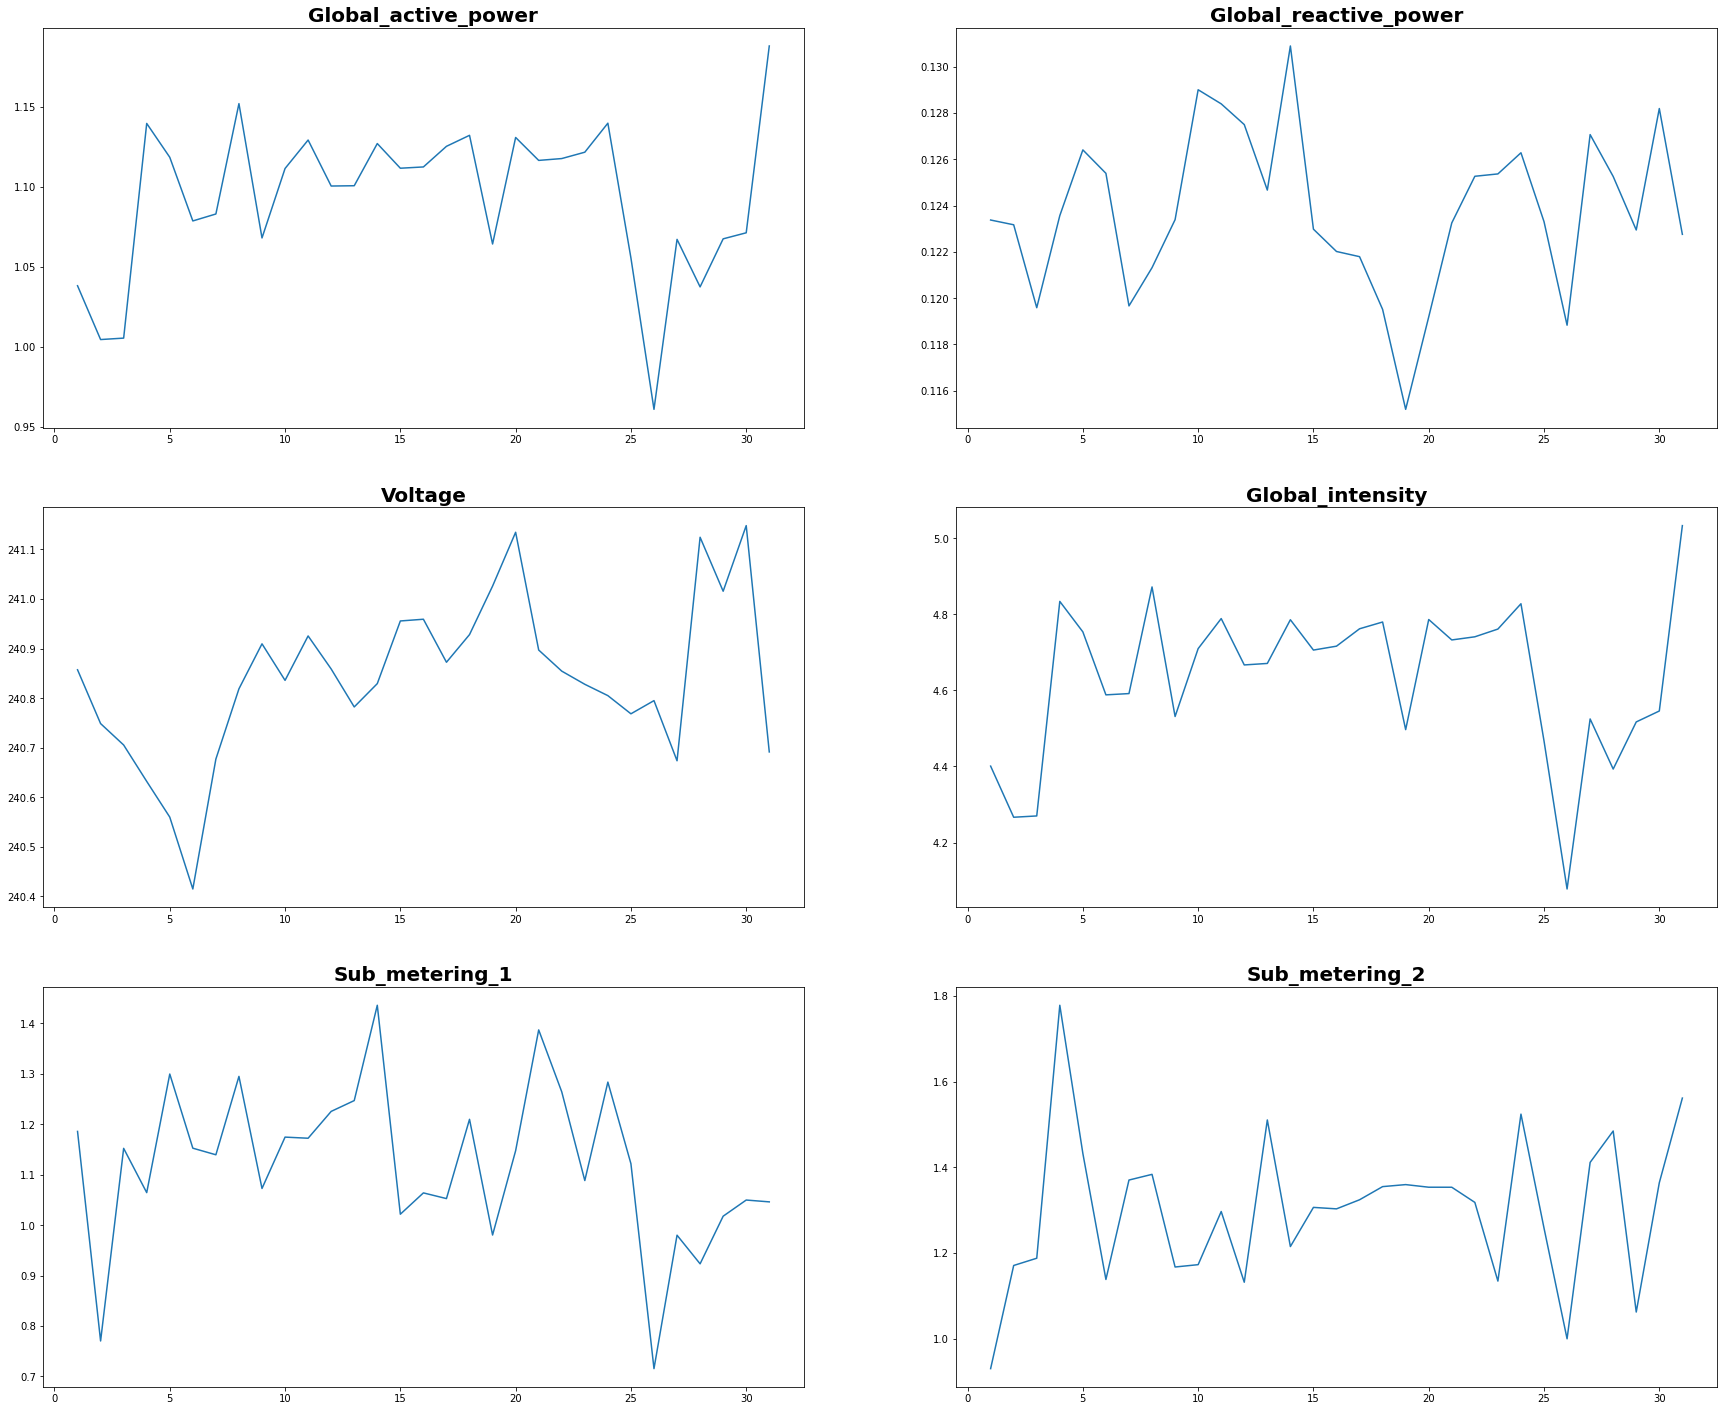

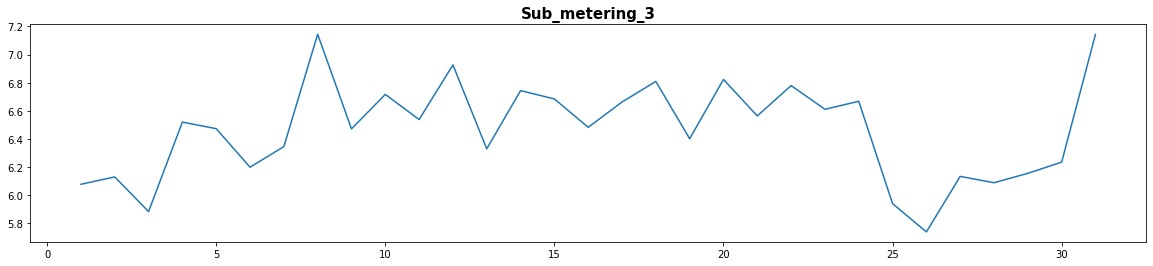

In [11]:
consumption_day_month = df_2.groupby(df_2.index.day).mean()
fig, axs = plt.subplots(3, 2, figsize = (30, 25))
columns = consumption_day_month.columns

axs[0, 0].plot(consumption_day_month[columns[0]])
axs[0, 0].set_title(columns[0], fontweight = 'bold', size = 20)

axs[0, 1].plot(consumption_day_month[columns[1]])
axs[0, 1].set_title(columns[1], fontweight = 'bold', size = 20)

axs[1, 0].plot(consumption_day_month[columns[2]])
axs[1, 0].set_title(columns[2], fontweight = 'bold', size = 20)

axs[1, 1].plot(consumption_day_month[columns[3]])
axs[1, 1].set_title(columns[3], fontweight = 'bold', size = 20)

axs[2, 0].plot(consumption_day_month[columns[4]])
axs[2, 0].set_title(columns[4], fontweight = 'bold', size = 20)

axs[2, 1].plot(consumption_day_month[columns[5]])
axs[2, 1].set_title(columns[5], fontweight = 'bold', size = 20)

fig, axs = plt.subplots( figsize = (20, 4))
axs.plot(consumption_day_month[columns[6]])
axs.set_title(columns[6], fontweight = 'bold', size = 15)

Below we will be Reasampling using downsampling method inorder to aggregate the data  together.

# Average consumption of each hour in a day

In [12]:
resampled_day = df_2.resample('H').sum()
resampled_day.index = resampled_day.index.time
consumption_time = resampled_day.groupby(resampled_day.index).mean()


Text(0.5, 1.0, 'Sub_metering_3')

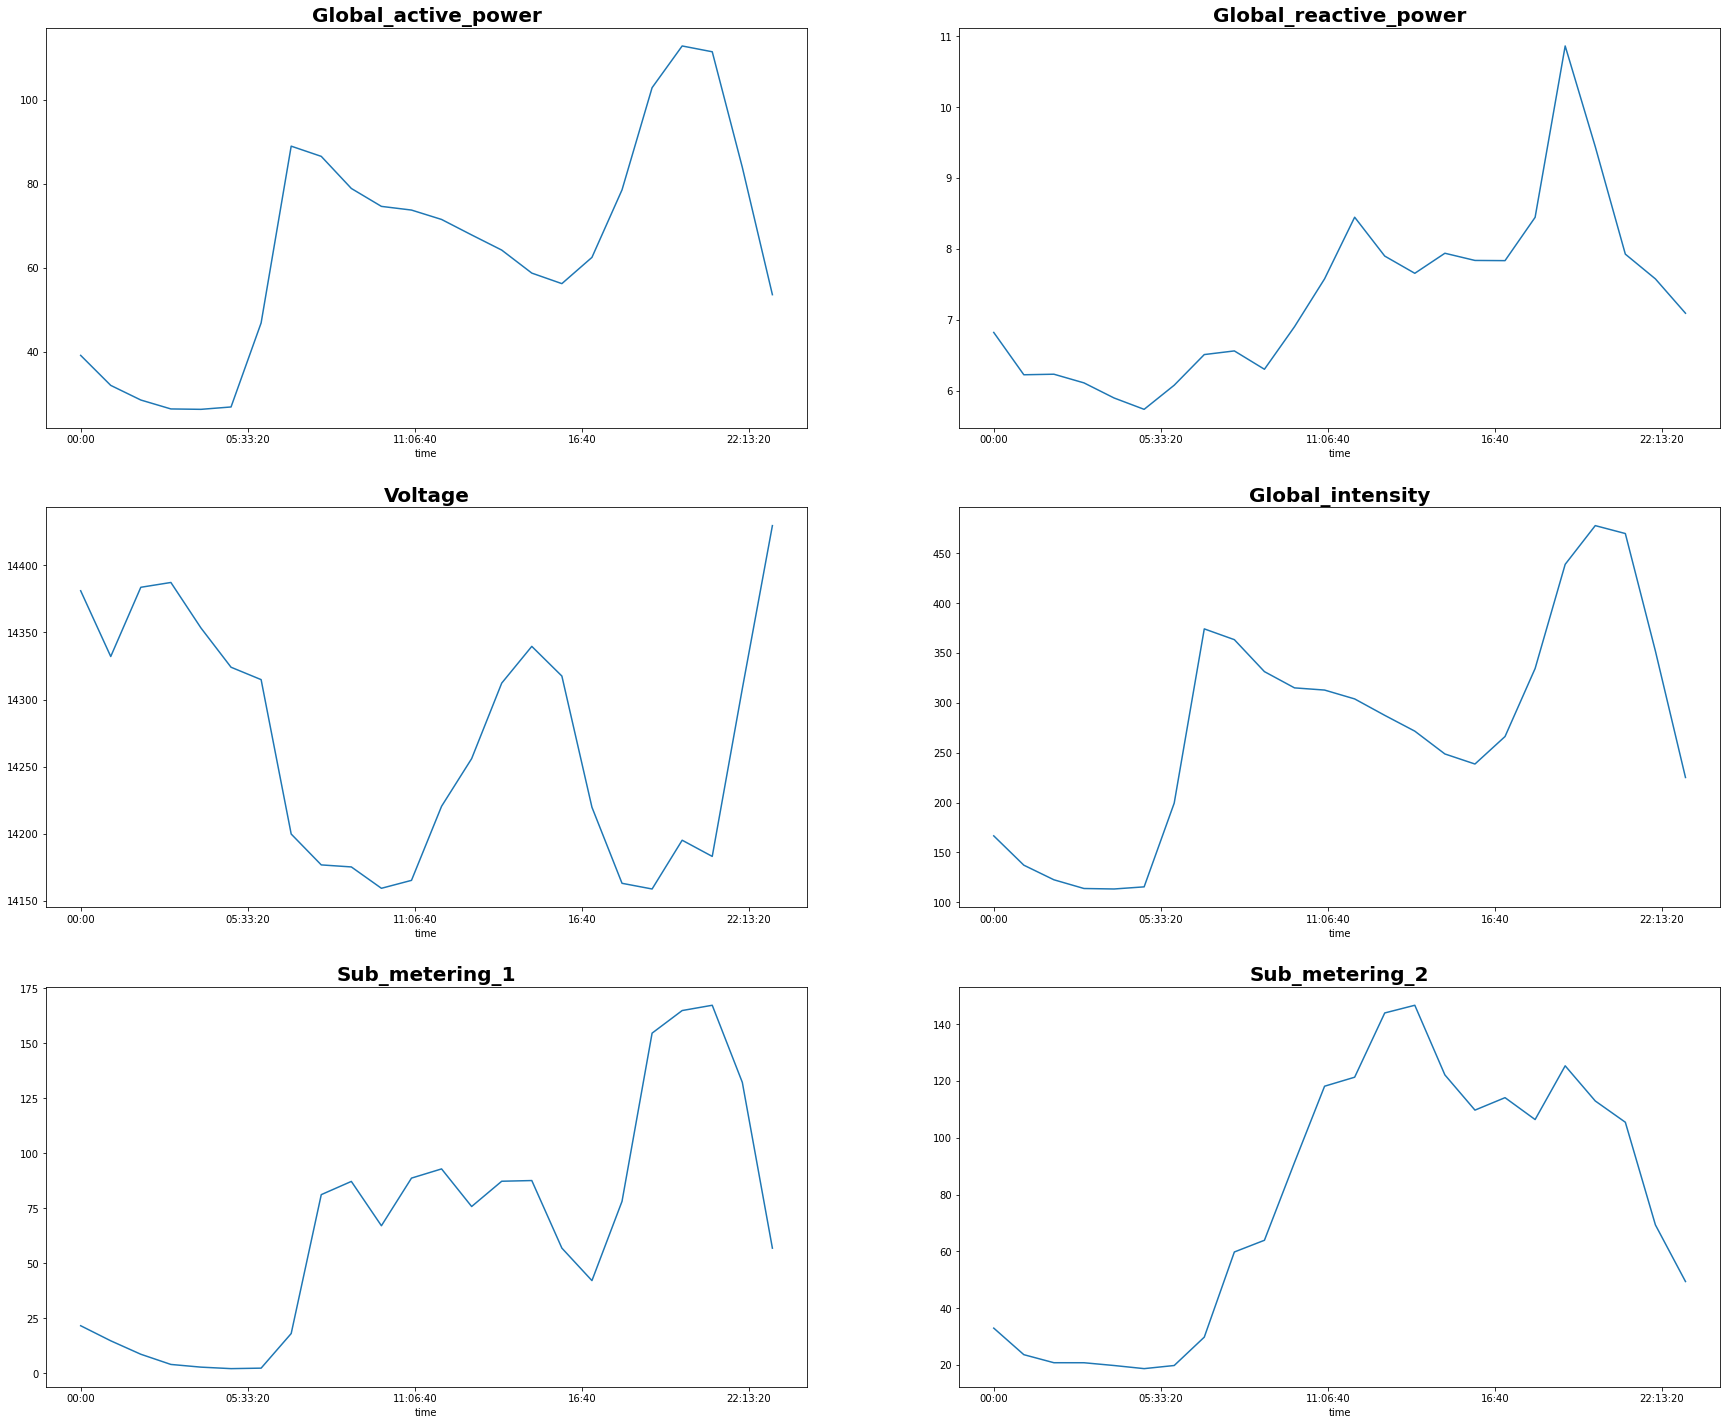

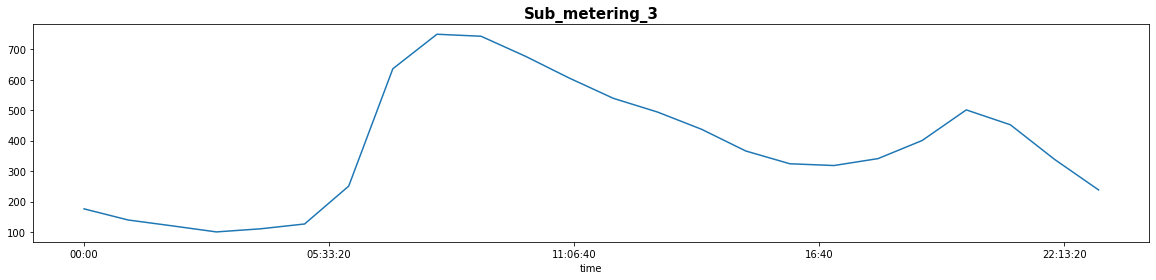

In [13]:
fig, axs = plt.subplots(3, 2, figsize = (30, 25))
columns = consumption_time.columns

axs[0, 0].plot(consumption_time[columns[0]])
axs[0, 0].set_title(columns[0], fontweight = 'bold', size = 20)

axs[0, 1].plot(consumption_time[columns[1]])
axs[0, 1].set_title(columns[1], fontweight = 'bold', size = 20)

axs[1, 0].plot(consumption_time[columns[2]])
axs[1, 0].set_title(columns[2], fontweight = 'bold', size = 20)

axs[1, 1].plot(consumption_time[columns[3]])
axs[1, 1].set_title(columns[3], fontweight = 'bold', size = 20)

axs[2, 0].plot(consumption_time[columns[4]])
axs[2, 0].set_title(columns[4], fontweight = 'bold', size = 20)

axs[2, 1].plot(consumption_time[columns[5]])
axs[2, 1].set_title(columns[5], fontweight = 'bold', size = 20)

fig, axs = plt.subplots( figsize = (20, 4))
axs.plot(consumption_time[columns[6]])
axs.set_title(columns[6], fontweight = 'bold', size = 15)

# Average consumption of each month in 4 years

Text(0.5, 1.0, 'Sub_metering_3')

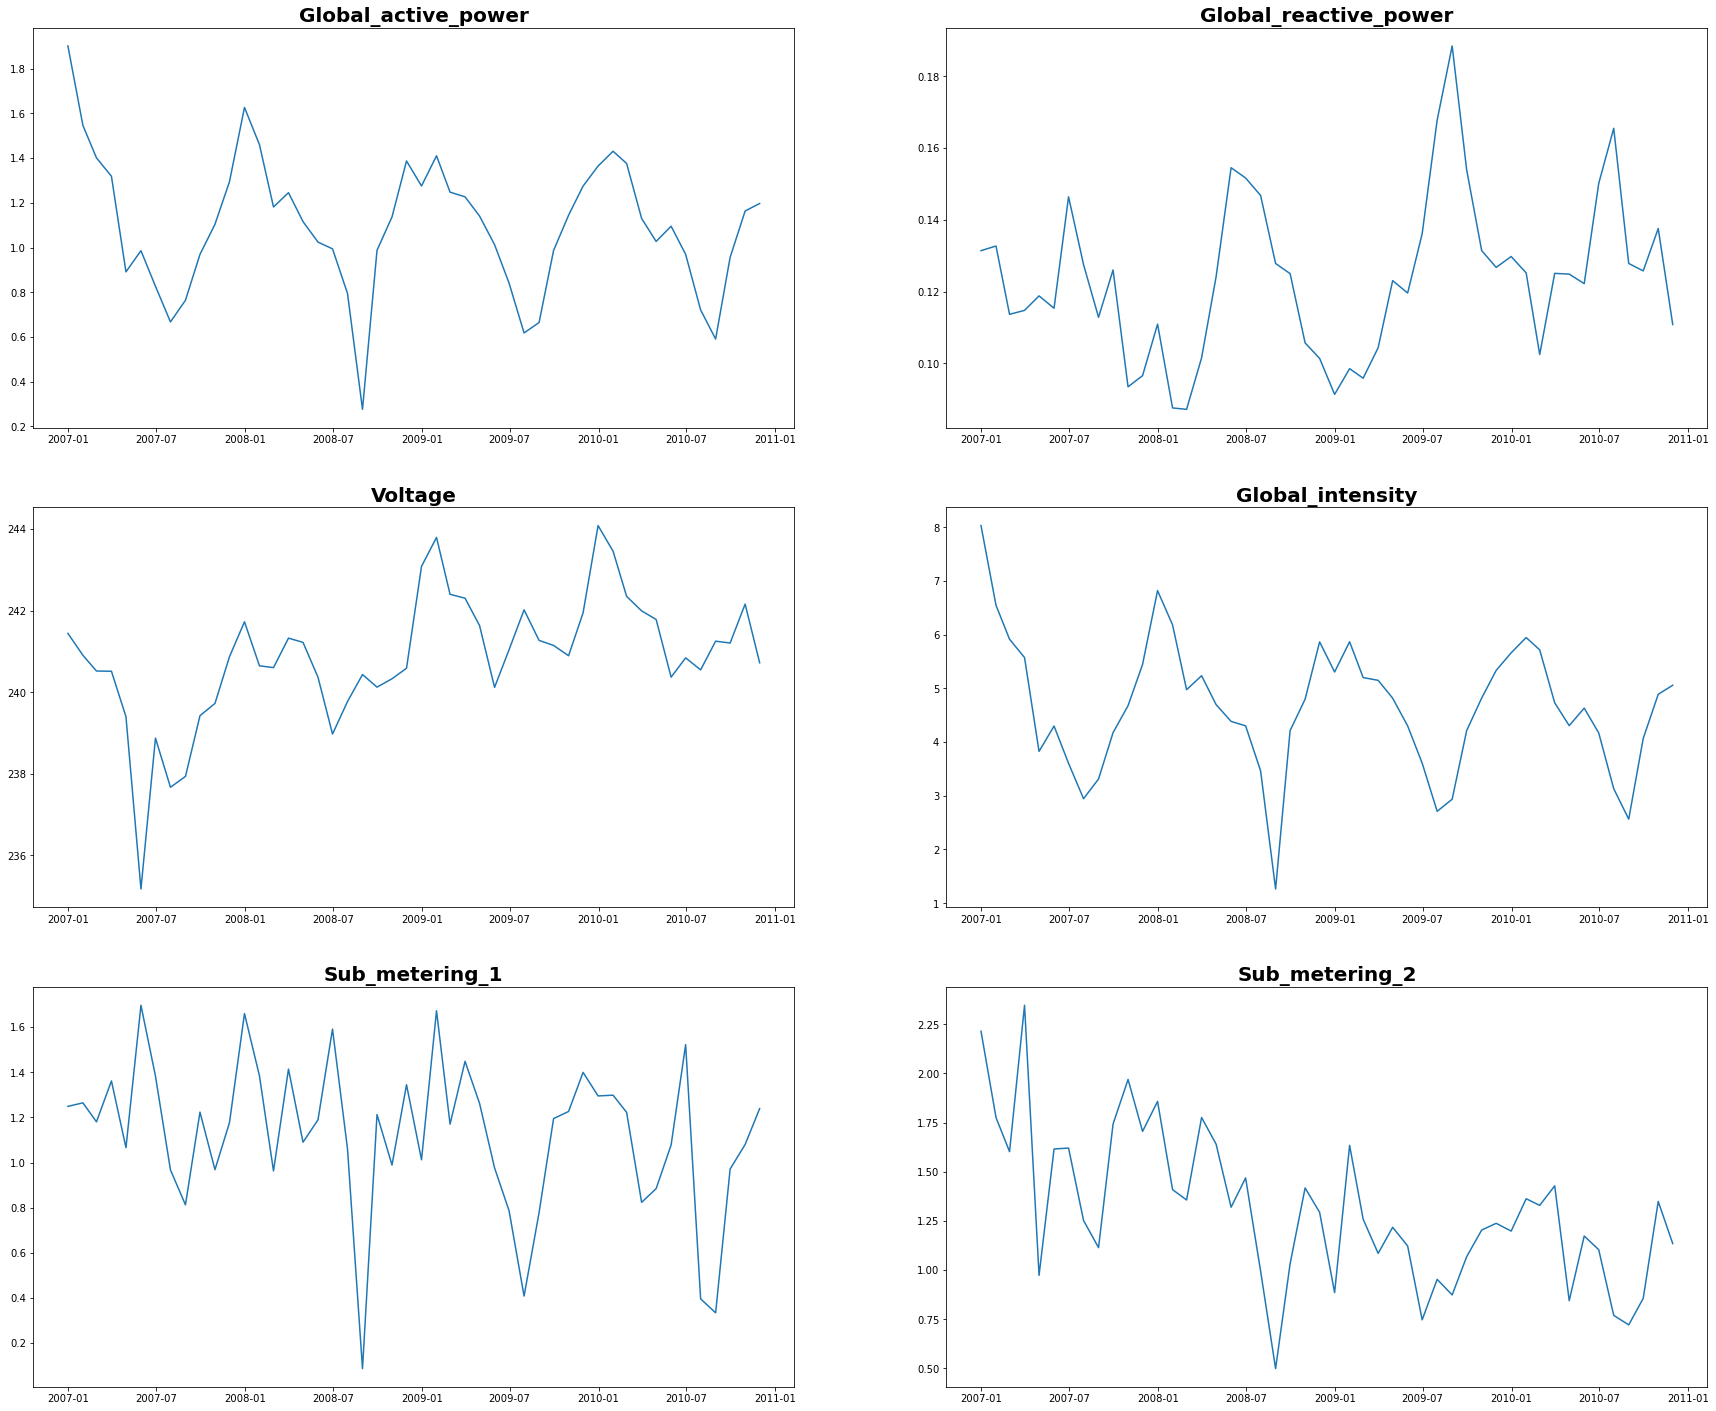

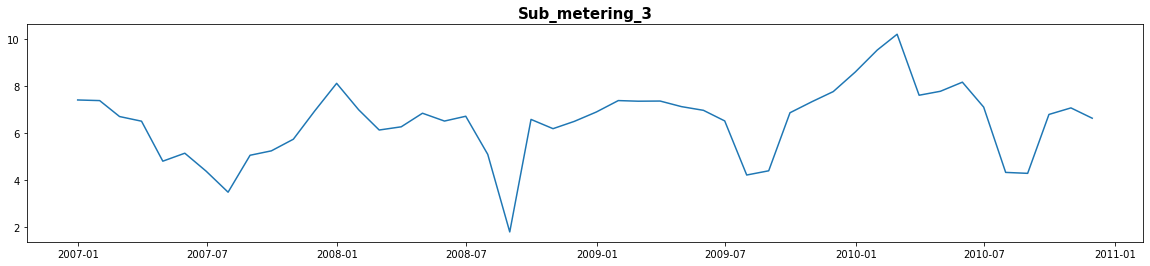

In [14]:
consumption_resampled_mnthly =df_2.resample('M').mean()

fig, axs = plt.subplots(3, 2, figsize = (30, 25))
columns = consumption_resampled_mnthly.columns

axs[0, 0].plot(consumption_resampled_mnthly[columns[0]])
axs[0, 0].set_title(columns[0], fontweight = 'bold', size = 20)

axs[0, 1].plot(consumption_resampled_mnthly[columns[1]])
axs[0, 1].set_title(columns[1], fontweight = 'bold', size = 20)

axs[1, 0].plot(consumption_resampled_mnthly[columns[2]])
axs[1, 0].set_title(columns[2], fontweight = 'bold', size = 20)

axs[1, 1].plot(consumption_resampled_mnthly[columns[3]])
axs[1, 1].set_title(columns[3], fontweight = 'bold', size = 20)

axs[2, 0].plot(consumption_resampled_mnthly[columns[4]])
axs[2, 0].set_title(columns[4], fontweight = 'bold', size = 20)

axs[2, 1].plot(consumption_resampled_mnthly[columns[5]])
axs[2, 1].set_title(columns[5], fontweight = 'bold', size = 20)

fig, axs = plt.subplots( figsize = (20, 4))
axs.plot(consumption_resampled_mnthly[columns[6]])
axs.set_title(columns[6], fontweight = 'bold', size = 15)

# Augmented Dickey-Fuller Test (ADF Test)/unit root test to check stationarity

In [15]:
from statsmodels.tsa.stattools import adfuller
def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)
    
    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")


In [16]:
adf_test(consumption_resampled_mnthly["Global_active_power"])

Test Statistic          -4.897270
p-value                  0.000035
# Lags                   9.000000
# Observations          38.000000
Critical Value (1%)     -3.615509
Critical Value (5%)     -2.941262
Critical Value (10%)    -2.609200
dtype: float64
 Series is Stationary


In [17]:
adf_test(consumption_resampled_mnthly['Global_reactive_power'])

Test Statistic          -3.951475
p-value                  0.001687
# Lags                   3.000000
# Observations          44.000000
Critical Value (1%)     -3.588573
Critical Value (5%)     -2.929886
Critical Value (10%)    -2.603185
dtype: float64
 Series is Stationary


In [18]:
adf_test(consumption_resampled_mnthly['Voltage'])

Test Statistic          -2.534397
p-value                  0.107328
# Lags                   1.000000
# Observations          46.000000
Critical Value (1%)     -3.581258
Critical Value (5%)     -2.926785
Critical Value (10%)    -2.601541
dtype: float64
 Series is Non-Stationary


From the above results gotten, we can see that p-value is greater than the critical value at a 5% significance level, also the ADF statistic is greater that any of the critical values obtain. This shows that the series is indeed non-stationary, therefore it is neccesary to carry out log differencing on the to make it staionary.

In [19]:
adf_test(consumption_resampled_mnthly['Global_intensity'])

Test Statistic         -6.054392e+00
p-value                 1.255263e-07
# Lags                  7.000000e+00
# Observations          4.000000e+01
Critical Value (1%)    -3.605565e+00
Critical Value (5%)    -2.937069e+00
Critical Value (10%)   -2.606986e+00
dtype: float64
 Series is Stationary


In [20]:
adf_test(consumption_resampled_mnthly['Sub_metering_2'])

Test Statistic          -4.583647
p-value                  0.000138
# Lags                   0.000000
# Observations          47.000000
Critical Value (1%)     -3.577848
Critical Value (5%)     -2.925338
Critical Value (10%)    -2.600774
dtype: float64
 Series is Stationary


In [21]:
adf_test(consumption_resampled_mnthly['Sub_metering_3'])

Test Statistic          -3.354857
p-value                  0.012598
# Lags                   0.000000
# Observations          47.000000
Critical Value (1%)     -3.577848
Critical Value (5%)     -2.925338
Critical Value (10%)    -2.600774
dtype: float64
 Series is Stationary


# Differencing to remove non-stationarity

In [22]:
def difference(dataset, interval=1):
    diff = list()
    diff.append(0)
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

consumption_resampled_mnthly['Voltage'] = difference(consumption_resampled_mnthly['Voltage'])

In [23]:
adf_test(consumption_resampled_mnthly['Voltage'])

Test Statistic         -5.770923e+00
p-value                 5.394847e-07
# Lags                  1.000000e+00
# Observations          4.600000e+01
Critical Value (1%)    -3.581258e+00
Critical Value (5%)    -2.926785e+00
Critical Value (10%)   -2.601541e+00
dtype: float64
 Series is Stationary


In [24]:
df_2 = pd.read_csv('/kaggle/input/electric-power-consumption-data-set/household_power_consumption.txt', sep=';', 
                 parse_dates={'dates' : ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['nan','?'], index_col=['dates'])

In [25]:
from fbprophet import Prophet

In [26]:
df_monthly =consumption_resampled_mnthly.reset_index()
df_monthly.head()

,dates,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-31,1.901295,0.131386,0.000000,8.029956,1.248636,2.214987,7.409558
1,2007-01-31,1.546034,0.132676,-0.536024,6.546915,1.264237,1.775931,7.383351
2,2007-02-28,1.401084,0.113637,-0.385711,5.914569,1.180217,1.602361,6.703557
3,2007-03-31,1.318627,0.114747,-0.005921,5.572979,1.361343,2.346872,6.504648
4,2007-04-30,0.891189,0.118778,-1.113443,3.825676,1.065886,0.973149,4.800339


In [27]:
df_monthly = df_monthly[['dates','Global_active_power']]
df_monthly.head()

,dates,Global_active_power
0,2006-12-31,1.901295
1,2007-01-31,1.546034
2,2007-02-28,1.401084
3,2007-03-31,1.318627
4,2007-04-30,0.891189


In [28]:
new_df = df_monthly.rename(columns={"dates": "ds", "Global_active_power": "y"})
new_df.head()

,ds,y
0,2006-12-31,1.901295
1,2007-01-31,1.546034
2,2007-02-28,1.401084
3,2007-03-31,1.318627
4,2007-04-30,0.891189


In [29]:
model = Prophet()
model.fit(new_df)

In [30]:
#predict for the next 12 months
future = model.make_future_dataframe(periods=12, freq='M') 
forecast = model.predict(future) 
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-31,1.176650,1.542777,1.733792,1.176650,1.176650,0.459530,0.459530,0.459530,0.459530,0.459530,0.459530,0.0,0.0,0.0,1.636180
1,2007-01-31,1.173396,1.392509,1.583213,1.173396,1.173396,0.318145,0.318145,0.318145,0.318145,0.318145,0.318145,0.0,0.0,0.0,1.491541
2,2007-02-28,1.170456,1.317123,1.509330,1.170456,1.170456,0.244427,0.244427,0.244427,0.244427,0.244427,0.244427,0.0,0.0,0.0,1.414883
3,2007-03-31,1.167201,1.191317,1.367411,1.167201,1.167201,0.110583,0.110583,0.110583,0.110583,0.110583,0.110583,0.0,0.0,0.0,1.277784
4,2007-04-30,1.164051,0.887142,1.073597,1.164051,1.164051,-0.183963,-0.183963,-0.183963,-0.183963,-0.183963,-0.183963,0.0,0.0,0.0,0.980089
5,2007-05-31,1.160797,0.999042,1.186137,1.160797,1.160797,-0.070015,-0.070015,-0.070015,-0.070015,-0.070015,-0.070015,0.0,0.0,0.0,1.090781
6,2007-06-30,1.157647,0.818888,1.008274,1.157647,1.157647,-0.242650,-0.242650,-0.242650,-0.242650,-0.242650,-0.242650,0.0,0.0,0.0,0.914997
7,2007-07-31,1.154393,0.608815,0.803869,1.154393,1.154393,-0.448712,-0.448712,-0.448712,-0.448712,-0.448712,-0.448712,0.0,0.0,0.0,0.705681
8,2007-08-31,1.151139,0.710140,0.900354,1.151139,1.151139,-0.347746,-0.347746,-0.347746,-0.347746,-0.347746,-0.347746,0.0,0.0,0.0,0.803393
9,2007-09-30,1.147990,0.860191,1.052136,1.147990,1.147990,-0.195880,-0.195880,-0.195880,-0.195880,-0.195880,-0.195880,0.0,0.0,0.0,0.952110


yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries,so let's compare btw the predictions (yhat) and the trend and see if their values are very close

In [31]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-31,1.636180,1.542777,1.733792,1.176650,1.176650,1.176650
1,2007-01-31,1.491541,1.392509,1.583213,1.173396,1.173396,1.173396
2,2007-02-28,1.414883,1.317123,1.509330,1.170456,1.170456,1.170456
3,2007-03-31,1.277784,1.191317,1.367411,1.167201,1.167201,1.167201
4,2007-04-30,0.980089,0.887142,1.073597,1.164051,1.164051,1.164051
5,2007-05-31,1.090781,0.999042,1.186137,1.160797,1.160797,1.160797
6,2007-06-30,0.914997,0.818888,1.008274,1.157647,1.157647,1.157647
7,2007-07-31,0.705681,0.608815,0.803869,1.154393,1.154393,1.154393
8,2007-08-31,0.803393,0.710140,0.900354,1.151139,1.151139,1.151139
9,2007-09-30,0.952110,0.860191,1.052136,1.147990,1.147990,1.147990


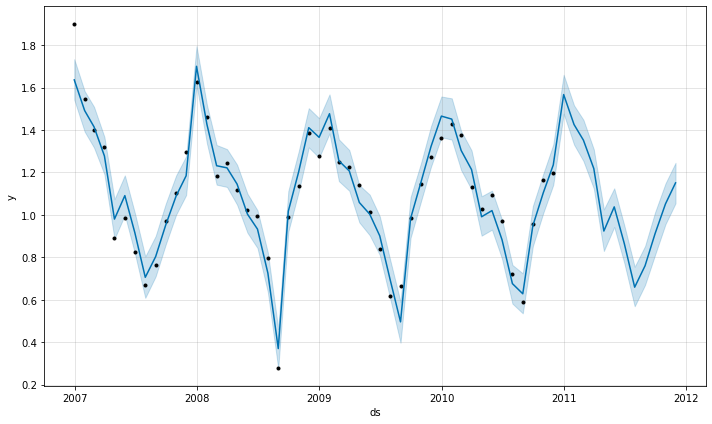

In [32]:
model.plot(forecast)
plt.show()  